In [8]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

Prob1: Using Least Square Method

In [33]:
tb1 = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/mle.xlsx')
tb1

,Id,Y,X
0,1,2,1
1,2,6,4
2,3,7,5
3,4,9,6
4,5,15,9


In [34]:
x = tb1['X']
y = tb1['Y']
x2 = sm.add_constant(x)
mod1 = sm.OLS(y, x2)
mod2 = mod1.fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     145.9
Date:                Sat, 21 Mar 2020   Prob (F-statistic):            0.00122
Time:                        15:18:11   Log-Likelihood:                -4.5811
No. Observations:                   5   AIC:                             13.16
Df Residuals:                       3   BIC:                             12.38
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2882      0.755     -0.382      0.7

C:\Users\suvar\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


Prob1: Parameter Estimation Using MLE

In [35]:
e = mod2.resid # Error Term
e

0    0.670588
1   -0.182353
2   -0.800000
3   -0.417647
4    0.729412
dtype: float64

In [36]:
np.std(e) # stdev of Error Term

0.6048820983804829

In [37]:
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m * x + b
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2)+ 1 /
        (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    return L


In [38]:
x = np.array([1, 4, 5, 6, 9])
y = np.array([2, 6, 7, 9, 15])
lik_model = minimize(lik, np.array([2, 2, 2]), method = 'L-BFGS-B')
lik_model

      fun: 4.581084072761114
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.97060204e-06,  1.42108547e-06, -5.15143483e-06])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 112
      nit: 19
   status: 0
  success: True
        x: array([ 1.61764707, -0.28823524,  0.6048819 ])

In [12]:
tb2 = pd.read_excel('G:/IIT - nptel/Data Analytics with Python/data/regcar.xlsx')
tb2

,TV Ads,car Sold
0,1,14
1,3,24
2,2,18
3,1,17
4,3,27


In [13]:
x = tb2['TV Ads']
y = tb2['car Sold']
x2 = sm.add_constant(x)
mod1 = sm.OLS(y, x2)
mod2 = mod1.fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:               car Sold   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     21.43
Date:                Sat, 21 Mar 2020   Prob (F-statistic):             0.0190
Time:                        15:00:37   Log-Likelihood:                -9.6687
No. Observations:                   5   AIC:                             23.34
Df Residuals:                       3   BIC:                             22.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000      2.366      4.226      0.0

C:\Users\suvar\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\suvar\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


Prob2: Using MLE method:

In [29]:
e = mod2.resid # Error Term
e

0   -1.0
1   -1.0
2   -2.0
3    2.0
4    2.0
dtype: float64

In [30]:
np.std(e) # stdev of Error Term

1.6733200530681507

In [31]:
def lik(parameters):
    m = parameters[0]
    b = parameters[1]
    sigma = parameters[2]
    for i in np.arange(0, len(x)):
        y_exp = m * x + b
    L = (len(x)/2 * np.log(2 * np.pi) + len(x)/2 * np.log(sigma ** 2)+ 1 /
        (2 * sigma ** 2) * sum((y - y_exp) ** 2))
    return L


In [32]:
x = np.array([1, 3, 2, 1, 3])
y = np.array([14, 24, 18, 17, 27])
# Next Minimize Error 
lik_model = minimize(lik, np.array([2, 2, 2]), method = 'Nelder-Mead')
lik_model

 final_simplex: (array([[ 5.00000631, 10.00000822,  1.67332132],
       [ 4.99996581, 10.00008112,  1.67332683],
       [ 4.99998382, 10.00002278,  1.67329385],
       [ 5.00001119,  9.9999767 ,  1.67334933]]), array([9.66874121, 9.66874121, 9.66874121, 9.66874121]))
           fun: 9.668741209395263
       message: 'Optimization terminated successfully.'
          nfev: 212
           nit: 118
        status: 0
       success: True
             x: array([ 5.00000631, 10.00000822,  1.67332132])

In [39]:
lik_model.x

array([ 1.61764707, -0.28823524,  0.6048819 ])

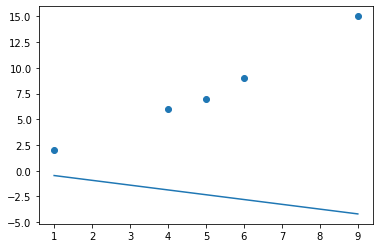

In [40]:
plt.scatter(x, y)
plt.plot(x, lik_model['x'][0] * x * lik_model['x'][1])
plt.show()

In [41]:
minimize?